In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv('marketing_campaign.csv', sep = '\t')
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
#1.
from typing import List
import numpy as np

def clean_and_encode_data(
    df: pd.DataFrame,
    numerical_cols: List[str] = ['Income'],
    categorical_cols: List[str] = ['Education', 'Marital_Status'],
    date_col: str = 'Dt_Customer',
    birth_col: str = 'Year_Birth',
    reference_year: int = 2024
) -> pd.DataFrame:
    for col in numerical_cols:
        df[col] = df[col].fillna(df[col].median())

    df[date_col] = pd.to_datetime(df[date_col], format='%d-%m-%Y', errors='coerce')
    
    df['Age'] = reference_year - df[birth_col]
    
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    df_encoded = df_encoded.replace([np.inf, -np.inf], np.nan).fillna(0)
    
    return df_encoded

df_encoded = clean_and_encode_data(df)
df_encoded.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,True,False,False,False,False,False,True,False,False,False
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,True,False,False,False,False,False,True,False,False,False
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,True,False,False,False,False,False,False,True,False,False
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,True,False,False,False,False,False,False,True,False,False
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,False,False,True,False,False,True,False,False,False,False


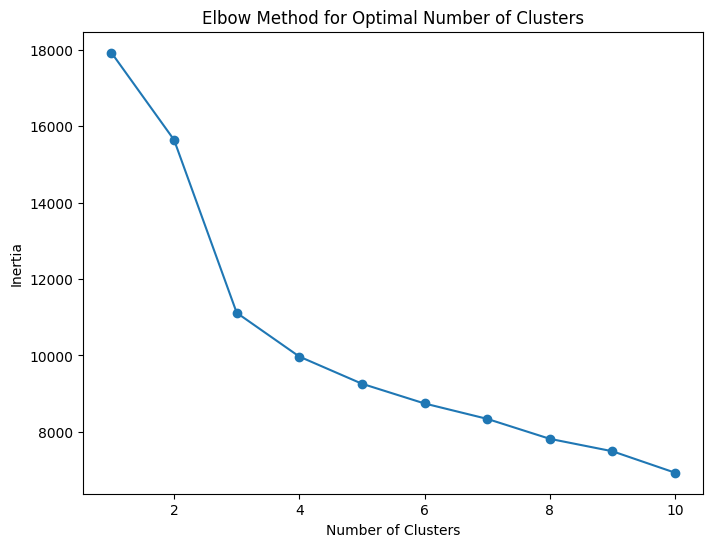

In [ ]:
#2.
def plot_elbow_method(df_encoded):
    features = [
        'Age', 'Income', 'Recency', 'MntWines', 'MntMeatProducts', 
        'NumWebPurchases', 'NumStorePurchases', 'Marital_Status_Single'
    ]

    X = df_encoded[features]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    inertia = []
    cluster_range = range(1, 11)
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()

plot_elbow_method(df_encoded)

In [ ]:
#I filled missing values with median values. 
# Then since date column was a string I changed it to the datetime. 
# Then I created the Age column based on birth year using 
# the fixed reference year. Then I one-hot encoded categorical columns. I 
# replaced any potential infinities or remaining NaNs with zero. After I 
# then standardized the data and converted all numerical columns to 
# integers where it was possible.

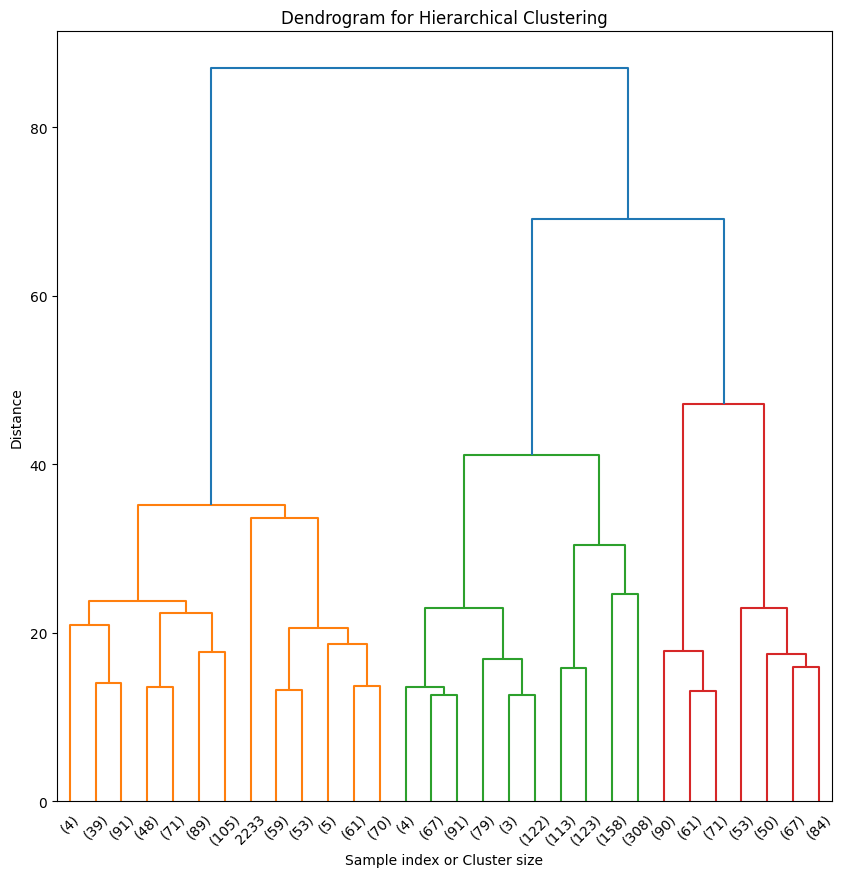

In [ ]:
#3.
def plot_dendrogram(df_encoded):
    features = [
        'Age', 'Income', 'Recency', 'MntWines', 'MntMeatProducts', 
        'NumWebPurchases', 'NumStorePurchases', 'Marital_Status_Single'
    ]

    X = df_encoded[features]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    linked = linkage(X_scaled, method='ward')

    plt.figure(figsize=(10, 10))
    dendrogram(linked, truncate_mode='lastp', p=30)
    plt.xlabel("Sample index or Cluster size")
    plt.ylabel("Distance")
    plt.title("Dendrogram for Hierarchical Clustering")
    plt.show()

plot_dendrogram(df_encoded)

In [ ]:
#I used endrogram for hierarchical clustering because it showed 
# an easy way to visualizd a way to determine the ideal number of clusters 
# without needing to specify that number in advance. A dendrogram shows 
# the hierarchy of cluster formations, starting with each data point as 
# its own cluster and progressively merging them based on similarity. By 
# examining where large vertical gaps appear between merges, natural 
# splits in the datas are idenetified. For this the ideal number of 
# cluster is five.

In [ ]:
#4.
# K-means showed that the ideal number of clusters is three and hierachical 
# clustering suggests that it's five. I think k-means is the better option
#  because it’s faster and more efficient, especially for large datasets. 
# With k-means, I can focus on key customer features and easily adjust 
# the cluster number using the elbow method to find the optimal 
# segmentation. With this it provides clear, well-defined clusters 
# that are effective for targeting customer groups. The hierarchical 
# clustering had to be tuned because it was very messy at 
# first and was genereally harder to understand.